# Loan Default Predictions

Financial institution (in this case) banks have a set of variables to decide whether a person is worthy of being loaned money. In this case, it is important to see which features of a client is most prominent in finding out whther that client is more likely going to default on a loan.

# Imported packages

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

# Importing the dataset

The dataset is obtained from Kaggle.com (Link: https://www.kaggle.com/datasets/kmldas/loan-default-prediction). In the dataset there are 10000 rows and 5 columns. The columns are as follows: 
1. Primary Key 
- Indexer 
2. Explanaroty Variables 
- Employed, Bank Balance, Annual Salary, and
3. Exploratory Variable
- Default (1 = Loan will default; 0 = Loan will NOT default)

In [7]:
os.chdir('/Users/raph/projects/')
loan_def = pd.read_csv('./simulations/datasets/Default_Fin.csv').set_index('Index')
loan_def.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0


# Data Preparation

In [10]:
# Obtaining the type of data found in the dataset
loan_def.dtypes

Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object

In [14]:
#Obtaining the explanatory data
ind_df = loan_def.iloc[:,0:3]
ind_df.head()

,Employed,Bank Balance,Annual Salary
Index,,,
1,1,8754.36,532339.56
2,0,9806.16,145273.56
3,1,12882.60,381205.68
4,1,6351.00,428453.88
5,1,9427.92,461562.00


In [13]:
#Obtaining the exploratory data
dep_df = loan_def.iloc[:,3]
dep_df.head()

Index
1    0
2    0
3    0
4    0
5    0
Name: Defaulted?, dtype: int64

# Data cleaning

We will be checking whether there exists any null values in the dataset.


In [8]:
loan_def.isna().value_counts()

Employed  Bank Balance  Annual Salary  Defaulted?
False     False         False          False         10000
dtype: int64

As seen from the cell above, we see that there does not exist any null values in any of the columns, thus, allowing us to move into EDA.

# EDA

## Employed

Classification of the work status of the clients [1 = Employed, 0 = Unemployed]
1    7056
0    2944
Name: Employed, dtype: int64


<BarContainer object of 2 artists>

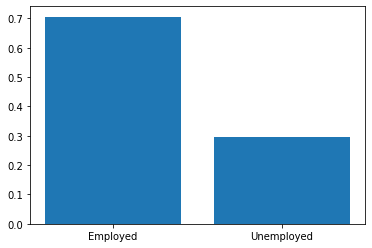

In [30]:
#Employed
print('Classification of the work status of the clients [1 = Employed, 0 = Unemployed]')
print(ind_df.Employed.value_counts())
print('====================================')
norm_emp = ind_df.Employed.value_counts()/len(ind_df)
plt.bar(['Employed','Unemployed'], norm_emp)


A bit more than 70% of the clients of the financial institution is shown to be employed with the rest being unemployed.

## Bank Balance

Here, we start by introducing the Diaconis-Freedman binning method.

In [37]:
from scipy.stats import iqr
def bin_range(df):
    vals = df.values
    bin_width = 2 * (iqr(vals) / (len(vals) ** (1./3)))
    num_bins = int((np.amax(vals) + bin_width) / bin_width)
    return round(bin_width,2), num_bins

def histo_viz(df):
    vals = df.values
    bin_width, num_bins = bin_range(df)
    hist = df.hist(bins=num_bins)
    return hist

The bin width is the following: 762.6
The number of bins is the following: 42


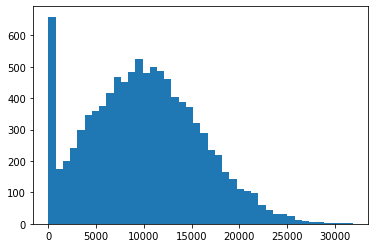

In [43]:
bb_width, bb_numbins = bin_range(ind_df['Bank Balance'])
print('The bin width is the following: {}'.format(bb_width))
print('The number of bins is the following: {}'.format(bb_numbins))
print('====================================')
#Showing the historgram, which shows how the bank balances are distributed
bb_n, bb_binval, bb_patches  = plt.hist(ind_df['Bank Balance'],bins=bb_numbins)


We can see that the data shows a righted skewed or postively skewed distribution. We then normalize the results to show the percentages of clients in said bins.

In [54]:
print('Percentage per bin')
for i in range(len(bb_n)-1):
    print('Bin [{}-{}]: {}%'.format(round(bb_binval[i],2), round(bb_binval[i+1],2), round(bb_n[i]/len(ind_df)*100,2)))


Percentage per bin
Bin [0.0-758.38]: 6.59%
Bin [758.38-1516.75]: 1.73%
Bin [1516.75-2275.13]: 1.99%
Bin [2275.13-3033.51]: 2.42%
Bin [3033.51-3791.89]: 2.98%
Bin [3791.89-4550.26]: 3.45%
Bin [4550.26-5308.64]: 3.58%
Bin [5308.64-6067.02]: 3.74%
Bin [6067.02-6825.39]: 4.16%
Bin [6825.39-7583.77]: 4.68%
Bin [7583.77-8342.15]: 4.52%
Bin [8342.15-9100.53]: 4.83%
Bin [9100.53-9858.9]: 5.24%
Bin [9858.9-10617.28]: 4.81%
Bin [10617.28-11375.66]: 5.0%
Bin [11375.66-12134.03]: 4.87%
Bin [12134.03-12892.41]: 4.6%
Bin [12892.41-13650.79]: 4.05%
Bin [13650.79-14409.17]: 3.87%
Bin [14409.17-15167.54]: 3.72%
Bin [15167.54-15925.92]: 3.2%
Bin [15925.92-16684.3]: 2.9%
Bin [16684.3-17442.67]: 2.35%
Bin [17442.67-18201.05]: 2.2%
Bin [18201.05-18959.43]: 1.65%
Bin [18959.43-19717.81]: 1.43%
Bin [19717.81-20476.18]: 1.1%
Bin [20476.18-21234.56]: 1.04%
Bin [21234.56-21992.94]: 0.98%
Bin [21992.94-22751.31]: 0.59%
Bin [22751.31-23509.69]: 0.45%
Bin [23509.69-24268.07]: 0.31%
Bin [24268.07-25026.45]: 0.31%
B

Choosing the top 5 bins, we obtain:

In [66]:
sort_bb_n = np.argsort(bb_n)[::-1]
for i in range(3):
    j = sort_bb_n[i]
    print('Bin [{}-{}]: {}%'.format(round(bb_binval[j],2), round(bb_binval[j+1],2), round(bb_n[j]/len(ind_df)*100,2)))


Bin [0.0-758.38]: 6.59%
Bin [9100.53-9858.9]: 5.24%
Bin [10617.28-11375.66]: 5.0%


## Annual Salary


A similar take from the 'Bank Balance' will be done on the 'Annual Salary'

The bin width is the following: 25028.12
The number of bins is the following: 36


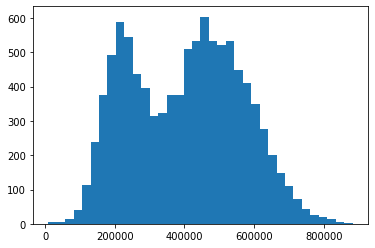

In [67]:
as_width, as_numbins = bin_range(ind_df['Annual Salary'])
print('The bin width is the following: {}'.format(as_width))
print('The number of bins is the following: {}'.format(as_numbins))
print('====================================')
#Showing the historgram, which shows how the bank balances are distributed
as_n, as_binval, as_patches  = plt.hist(ind_df['Annual Salary'],bins=as_numbins)

From the data visualization, we can see that the data seem to be fairly bimodal. This must mean that majority of the clients fall around the $200,000 and between the $400,000 to $600,000 range for their annual salary. Now, we move to seeing whether there exists correlation among the variables.

## Correlation

In [77]:
corr = ind_df.corr()
corr

,Employed,Bank Balance,Annual Salary
Employed,1.000000,-0.203578,0.753985
Bank Balance,-0.203578,1.000000,-0.152243
Annual Salary,0.753985,-0.152243,1.000000


Filtering the correlations to values greater than 0.5, we have:

In [78]:
temp = corr[((corr > 0.5) & (corr != 1))]
print(temp)
print('================================')
print(temp.count())
print('================================')
print('Total number of correlations that fit into the desire correlation conditions: {}'. format(sum(temp.count())))

               Employed  Bank Balance  Annual Salary
Employed            NaN           NaN       0.753985
Bank Balance        NaN           NaN            NaN
Annual Salary  0.753985           NaN            NaN
Employed         1
Bank Balance     0
Annual Salary    1
dtype: int64
Total number of correlations that fit into the desire correlation conditions: 2


We can see that the varibales annual salary and the employment is correlated which is to be ecxpected. However interestingly enough we notice that bank balance is not correlated with the annual salary. We now move to model fitting.

# Model Fitting

We will be testing three different models to decide which of the three models is the most suffieicnt and most effective in detecting whether a person will default on their loan. The models are as follows:

1. Logistic Regression (Golden Standard)
2. Naive Bayes Classifier
3. K Nearest Neighbors (KNN)
4. Classification and Regression Trees (Superior to Logistic Regression)

## Preparing the data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(ind_df,dep_df, test_size = 0.2)

## Logisitc Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [91]:
# Fitting into a logestic model
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

# Predicting the data
y_pred = logreg.predict(X_test)

### Evaluation Metrics

#### Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix

In [102]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [105]:
# bad accounts - entries mistakenly classified by the model.
# Accuracy - How many accounts were correctly classified by the model
acc = (tp+tn)/(tn+fp+fn+tp)
print('Accuracy: {}'.format(round(acc*100,2)))
print('=====================')

# Precision - How accurate when identifying bad accounts
pre = tp/(tp+fp)
print('Precision: {}%'.format(round(pre*100,2)))
print('=====================')

#Sensitivity - How many of the bad accounts were correctly classified by the model
sen = tp/(tp+fn)
print('Sensitivity: {}%'.format(round(sen*100,2)))
print('=====================')

#Specificity - How many of the actual good accounts were correctly classified by the model
spe = tn/(tn+fp)
print('Specificity: {}%'.format(round(spe*100,2)))
print('=====================')

#False Positive Rate - How many of the actual good acounts were misclassified by the model.
fpr = fp/(tn+fp)
print('False Postive Rate: {}%'.format(round(fpr*100,2)))
print('=====================')

#F1-Score - Overall Score of the Model (The closer to 1 the better; the closer to 0 the worse)
f1 = 2*pre*sen/(pre+sen)
print('F1-Score: {}'.format(round(f1,2)))
print('=====================')


Accuracy: 96.6
Precision: 0.0%
Sensitivity: 0.0%
Specificity: 99.95%
False Postive Rate: 0.05%
F1-Score: nan


/var/folders/qg/90z639dn6ws7fn4d4_jsyky40000gn/T/ipykernel_20924/3913414877.py:28: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*pre*sen/(pre+sen)
